Four Classes Rotating with Expansion V2. Bidimensional.
100 batches of 1738 instances



METHOD: Static lp as classifier
Execution time:  3.78690767471378
Average error: 79.5616
Average macro-F1: 0.20385538705629735
Average micro-F1: 0.2052
Acurácia Média:  20.438400000000005
Desvio Padrão:  31.24194554505209
Variância:  976.0591614400001


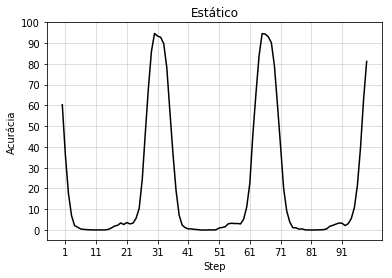

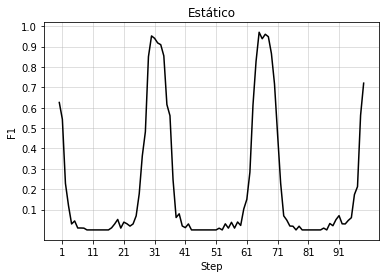




METHOD: Sliding lp as classifier
Execution time:  3.854342072974829
Average error: 82.9671
Average macro-F1: 0.12551605519547487
Average micro-F1: 0.1802
Acurácia Média:  17.0329
Desvio Padrão:  19.73197639847565
Variância:  389.35089259


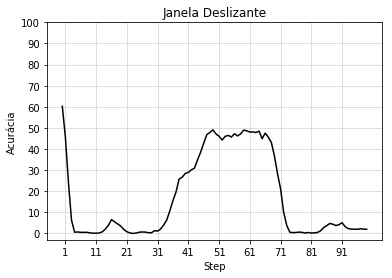

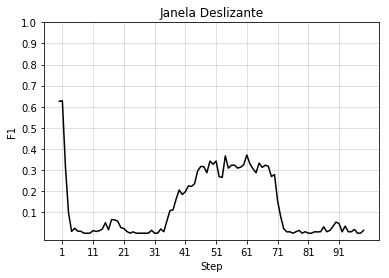




METHOD: Incremental lp as classifier
Execution time:  135.82842421156772
Average error: 79.8805
Average macro-F1: 0.19995313997696723
Average micro-F1: 0.20129999999999998
Acurácia Média:  20.1195
Desvio Padrão:  30.96822246674807
Variância:  959.0308027499999


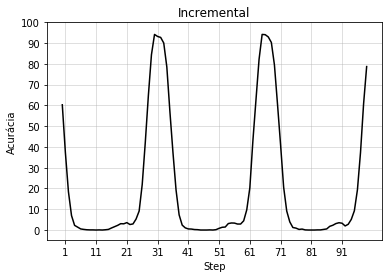

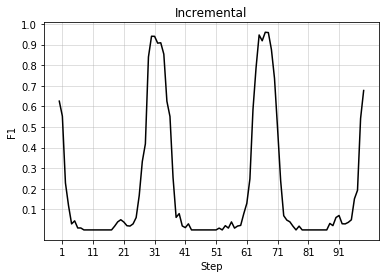




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  20.34551063004602
Average error: 83.9435
Average macro-F1: 0.16907295895235436
Average micro-F1: 0.17009999999999997
Acurácia Média:  16.0565
Desvio Padrão:  29.638343994730874
Variância:  878.4314347499997


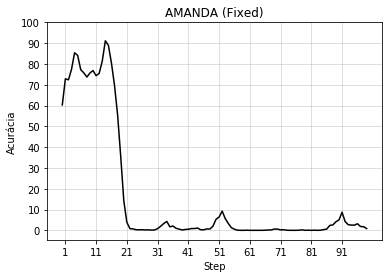

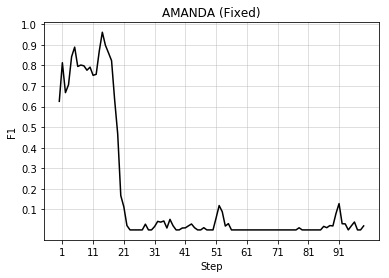




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
AMANDA-DCP Hellinger | Mean keeping percentage=0.29 | Std keeping percentage=0.19
Execution time:  19.92041546705363
Average error: 78.094
Average macro-F1: 0.20295089544442413
Average micro-F1: 0.21320000000000003
Acurácia Média:  21.906000000000002
Desvio Padrão:  19.662061641648876
Variância:  386.5966680000001


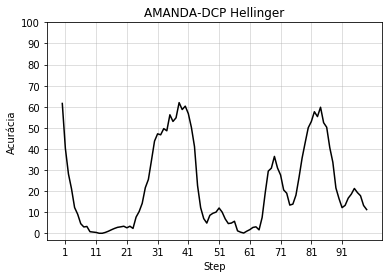

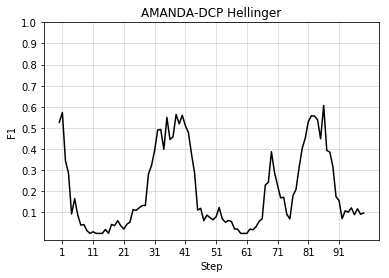




METHOD: lp as classifier and kde and Hellinger2 distance as dynamic CSE
AMANDA-DCP Hellinger2 | Mean keeping percentage=0.20 | Std keeping percentage=0.09
Execution time:  19.828421723443057
Average error: 81.0642
Average macro-F1: 0.19120466400626296
Average micro-F1: 0.19250000000000003
Acurácia Média:  18.9358
Desvio Padrão:  21.34201223783737
Variância:  455.4814863600001


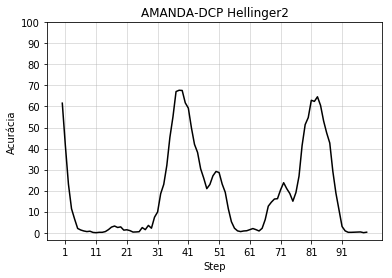

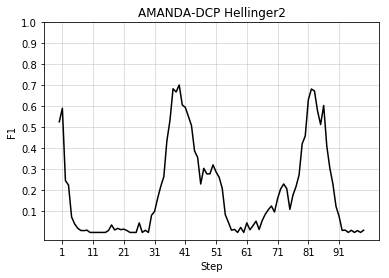




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -1.000 | Mean keeping percentage=0.15 | Std keeping percentage=0.05
Execution time:  20.146266895532676
Average error: 71.7361
Average macro-F1: 0.24876293990984824
Average micro-F1: 0.2859
Acurácia Média:  28.263900000000007
Desvio Padrão:  28.49993869800425
Variância:  812.2465057900002


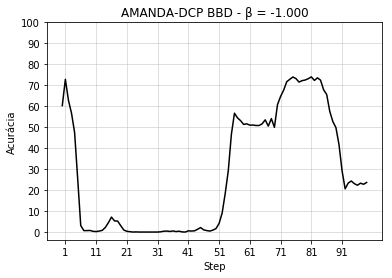

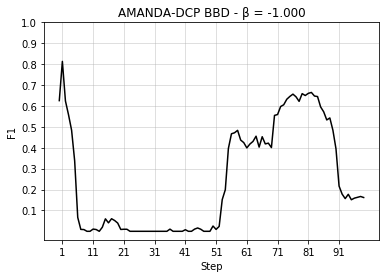

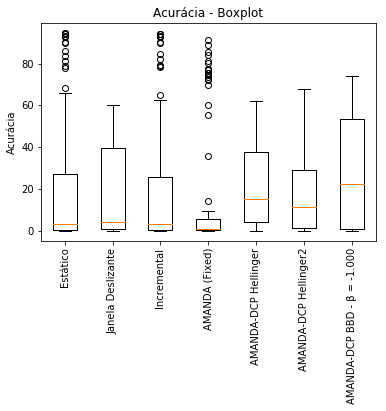

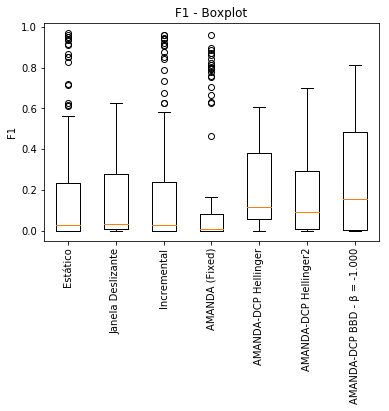

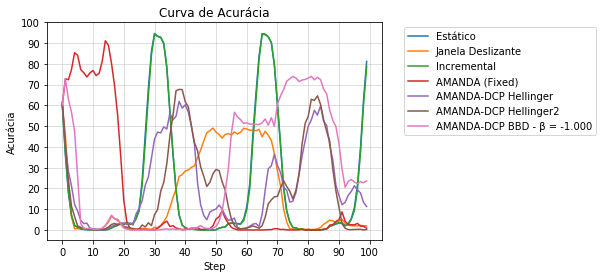

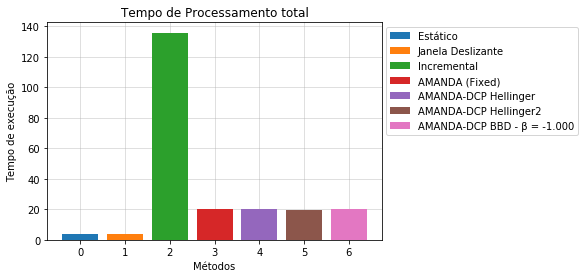

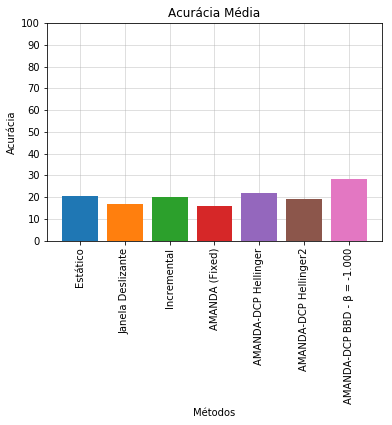

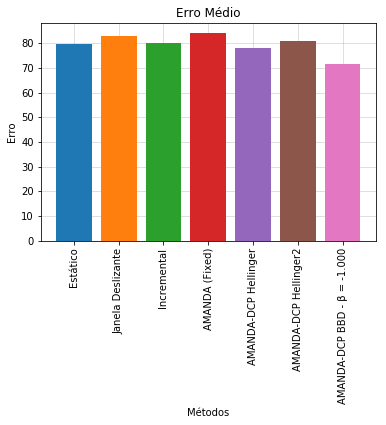

Pos 6 - Redução do Erro (Janela Deslizante):-16.662263190856443
Pos 4 - Redução do Erro (Incremental):-1.560298262094911
Pos 7 - Redução do Erro (AMANDA (Fixed)):-21.439545169876332
Pos 2 - Redução do Erro (AMANDA-DCP Hellinger):7.180601221230611
Pos 5 - Redução do Erro (AMANDA-DCP Hellinger2):-7.351847502739961
Pos 1 - Redução do Erro (AMANDA-DCP BBD - β = -1.000):38.288222170032874


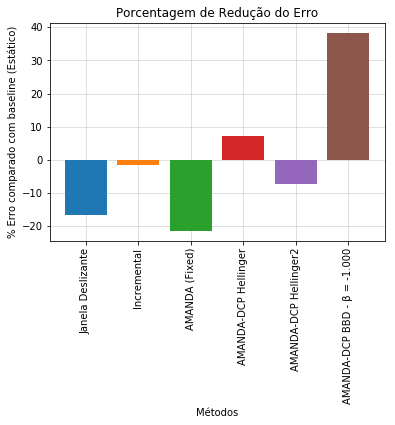

In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[4])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None, distanceMetric=None, beta=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K
        self.distanceMetric = distanceMetric
        self.beta = beta


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = False
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load4CRE_V2(path, sep)
    
    # 5% of initial labeled data
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 12, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 12, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 12, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 12, 0.9, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - DCP Original)
    experiments[4] = Experiment(amanda_dynamic, 2, None, "kde", sslClassifier, 'Hellinger')
    
    # Proposed method 3 (AMANDA - DCP Hellinger2)
    experiments[5] = Experiment(amanda_dynamic, 2, None, "kde", sslClassifier, 'Hellinger2')                         
    
    # Proposed method 4 (AMANDA - DCP BBD)
    lastIndex = list(experiments.keys())[-1]
    #betas = [-1, 2, 3, 10]
    #bestK = [12, 12, 12, 12]
    betas = [-1]
    bestK = [12]
    for i in range(len(betas)):
        experiments[lastIndex+1+i] = Experiment(amanda_dynamic, bestK[i], None, "kde", sslClassifier, 'BBD', beta=betas[i])
        
    # Proposed method 5 (AMANDA - DCP HDDDM)
    #experiments[17] = Experiment(amanda_dynamic, 12, None, "kde", sslClassifier, 'HDDDM')

    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 9)
    
    # levelIw matlab results
    #predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '4CRE-V2', steps)
    #externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()